In [1]:
#https://www.kdnuggets.com/2023/08/shap-values-model-interpretability-machine-learning.html

In [3]:
from sklearn import datasets
import pandas as pd
import numpy as np
import shap


In [4]:
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns = iris.feature_names)
y = pd.Series(iris.target, )

In [5]:
X.head(), y.head()

(   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                5.1               3.5                1.4               0.2
 1                4.9               3.0                1.4               0.2
 2                4.7               3.2                1.3               0.2
 3                4.6               3.1                1.5               0.2
 4                5.0               3.6                1.4               0.2,
 0    0
 1    0
 2    0
 3    0
 4    0
 dtype: int32)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [7]:
X_test.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [8]:
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)

In [17]:
clf.classes_

array([0, 1, 2])

In [10]:
from sklearn.metrics import classification_report, accuracy_score
cr = classification_report(y_test, y_hat)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.96      1.00      0.98        23
           2       1.00      0.96      0.98        23

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



In [11]:
accuracy_score(y_test, y_hat)

0.9866666666666667

In [13]:
explainer = shap.Explainer(clf)
shap_values = explainer.shap_values(X_test)

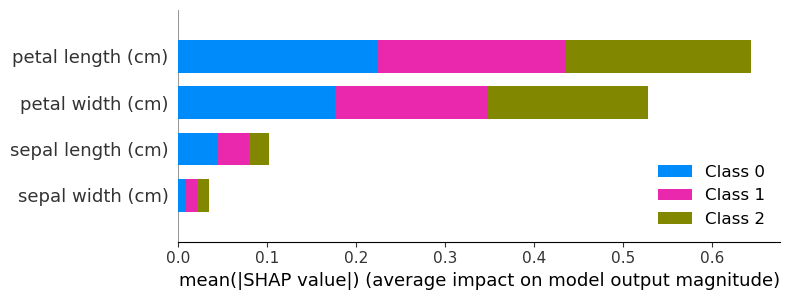

In [14]:
shap.summary_plot(shap_values, X_test)

In [15]:
print (len(shap_values))
print(type(shap_values))

3
<class 'list'>


In [13]:
for i in range(3):
    print(shap_values[i]) 


[[-0.02936517 -0.00690173 -0.11052821 -0.13413823]
 [-0.01762571  0.03074597  0.25950198  0.40644443]
 [-0.02372692 -0.00879393 -0.11068512 -0.13772736]
 [-0.02823184 -0.00803506 -0.10820263 -0.13646381]
 [-0.03083701 -0.0069455  -0.11240352 -0.1307473 ]
 [ 0.03458665  0.01536313  0.25927191  0.38984498]
 [-0.0248747  -0.00803506 -0.11052821 -0.13749537]
 [-0.02833887  0.00097705 -0.10875781 -0.1448137 ]
 [-0.02461758 -0.01280689 -0.10862143 -0.13488743]
 [-0.01867683 -0.01381412 -0.11094701 -0.13749537]
 [-0.02833887  0.00097705 -0.10875781 -0.1448137 ]
 [ 0.0784989   0.00132886  0.26094001  0.3782989 ]
 [-0.01208988  0.01945409  0.25610405  0.40559841]
 [ 0.07499748  0.00490017  0.26029193  0.37887708]
 [ 0.05793979  0.02607045  0.25648439  0.37857203]
 [-0.03551427  0.00794485 -0.10171237 -0.14165154]
 [-0.02845812 -0.00197043 -0.11099965 -0.13950514]
 [-0.01867683 -0.01381412 -0.11094701 -0.13749537]
 [-0.0248747  -0.00803506 -0.11052821 -0.13749537]
 [-0.02845812 -0.00374821 -0.11

In [14]:
shap_values[0].shape, X_test.shape

((75, 4), (75, 4))

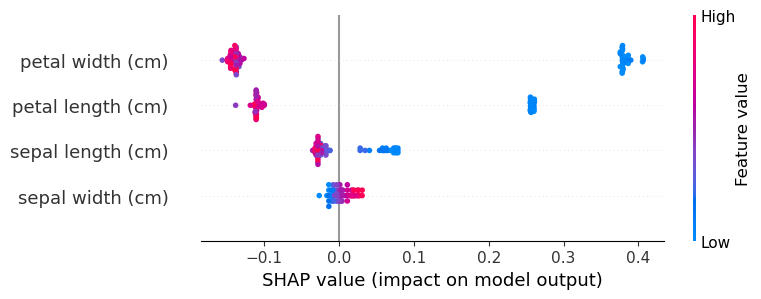

In [15]:
shap.summary_plot(shap_values[0], X_test)

In [18]:
y_test[12]

0

In [20]:
print(shap_values[0][12,:], shap_values[1][12,:], shap_values[2][12,:])
print(X_test.columns)

[-0.03420519  0.01179715  0.36027558  0.28106579] [ 0.03938674 -0.00149414 -0.16145517 -0.13230409] [-0.00518155 -0.01030301 -0.19882041 -0.1487617 ]
Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


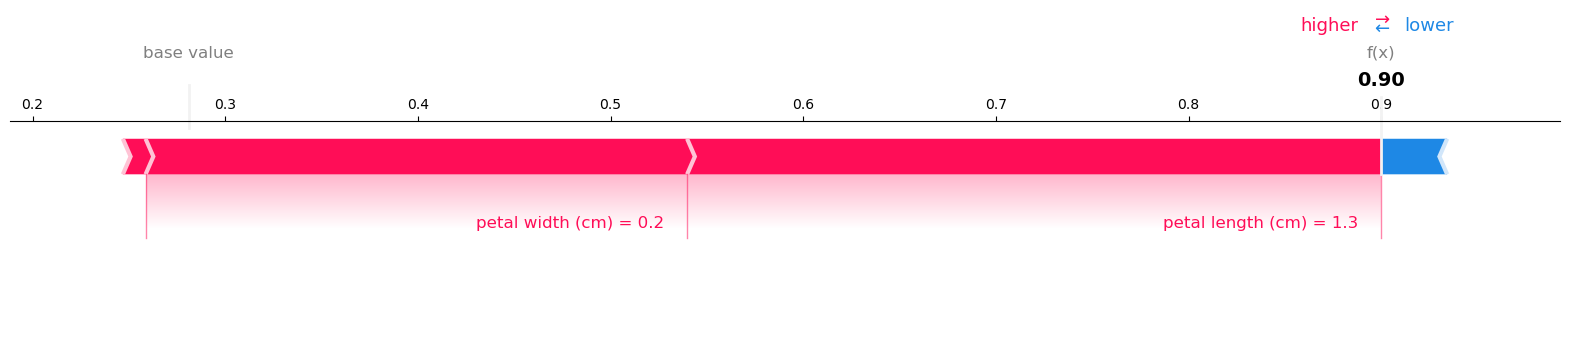

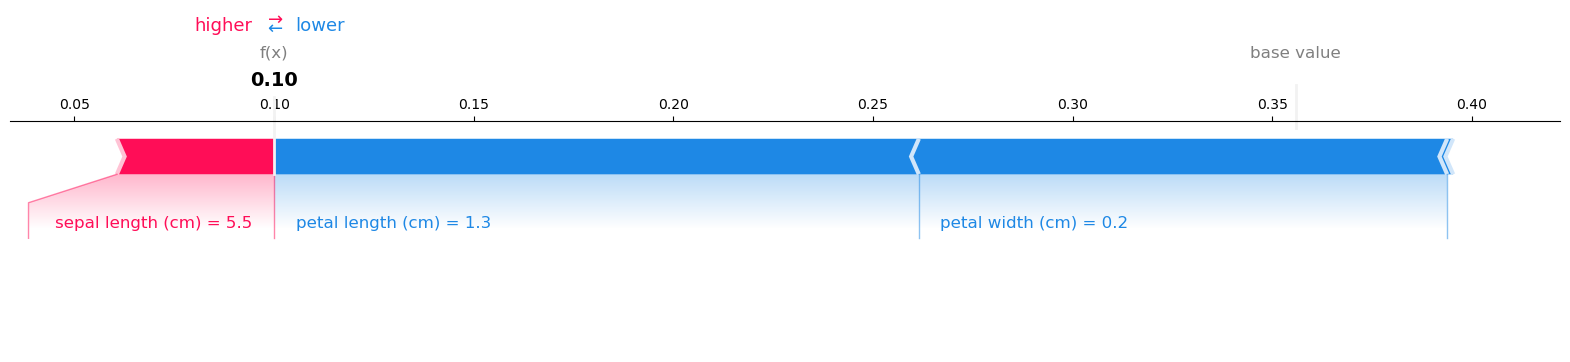

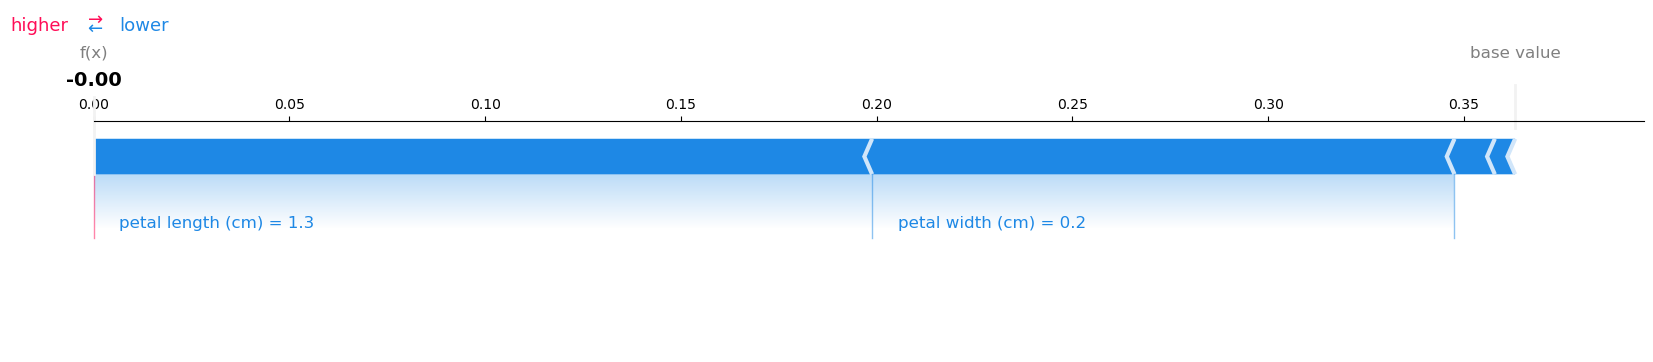

None

None

None

In [21]:
#extract single record feature importance
display(
shap.plots.force(explainer.expected_value[0], shap_values[0][12,:], X_test.iloc[12, :], matplotlib = True),
shap.plots.force(explainer.expected_value[1], shap_values[1][12,:], X_test.iloc[12, :], matplotlib = True),
shap.plots.force(explainer.expected_value[2], shap_values[2][12,:], X_test.iloc[12, :], matplotlib = True),
)

In [19]:
shap_values[0][12,:]

array([-0.01208988,  0.01945409,  0.25610405,  0.40559841])

In [20]:
pd.Series(shap_values[0][12,:],index = X_test.columns).sort_values(ascending=False).index[:2].to_list()

['petal width (cm)', 'petal length (cm)']

In [22]:
def get_top_k_feature(clf, X_test, clf_class=0, df_index =0, topk = 2, visul =False ):
    '''
    this give back the top k feature and importance value for given class and df_index
    get_top_k_feature(clf, X_test, clf_class=1, df_index =0, topk = 2 ) 

    '''
    explainer = shap.Explainer(clf)
    shap_values = explainer.shap_values(X_test)
    s = pd.Series(shap_values[clf_class][df_index,:],index = X_test.columns).sort_values(ascending=False)[:topk]
    combined_str = ','.join([ i[0] +":" + str(i[1]) for i in zip(s.index, s.values)])
    
    if visul:
        shap.plots.force(explainer.expected_value[clf_class], shap_values[clf_class][df_index,:], X_test.iloc[df_index, :], matplotlib = True)
    return combined_str


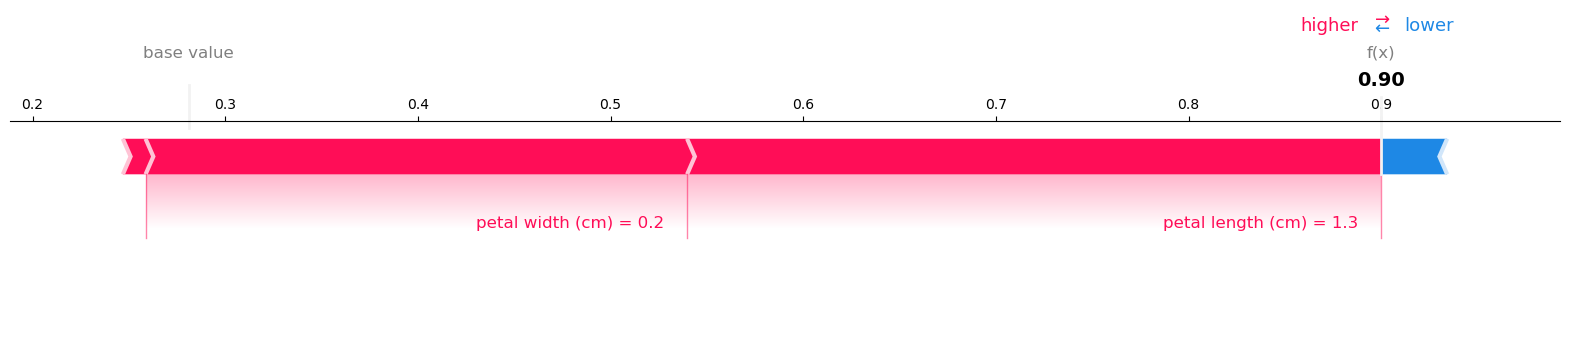

'petal length (cm):0.3602755813408218,petal width (cm):0.2810657896431'

In [24]:
get_top_k_feature(clf, X_test, clf_class=0, df_index =12, topk = 2, visul =True )

In [29]:
get_top_k_feature(clf, X_test, clf_class=1, df_index =0, topk = 2 )

'petal width (cm):0.2898321388501812,petal length (cm):0.27764479612802556'

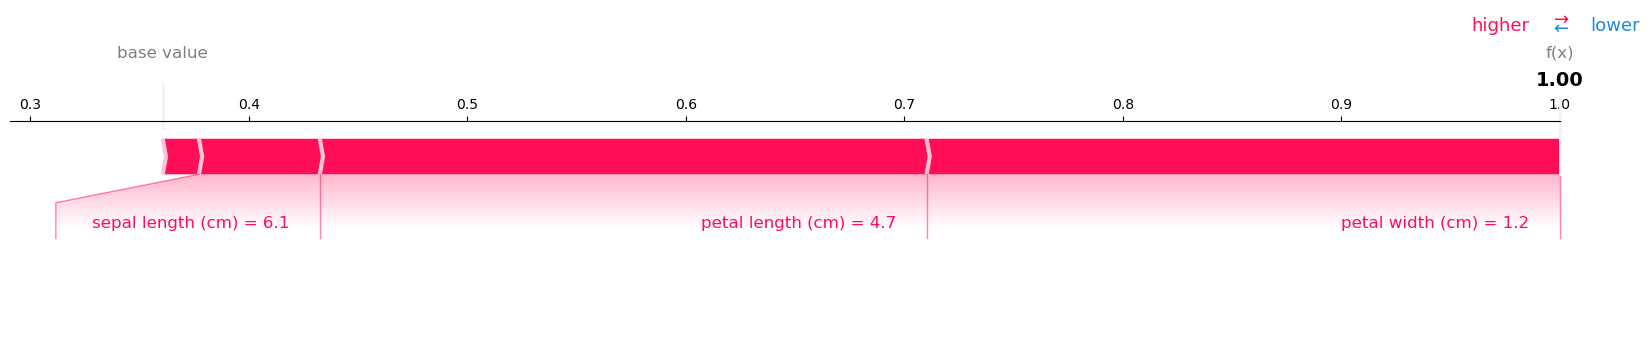

'petal width (cm):0.2898321388501812,petal length (cm):0.27764479612802556'

In [34]:
get_top_k_feature(clf, X_test, clf_class=1, df_index =0, topk = 2, visul= True )

In [25]:
#test with another records
y_test[:20]

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.


73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
dtype: int32

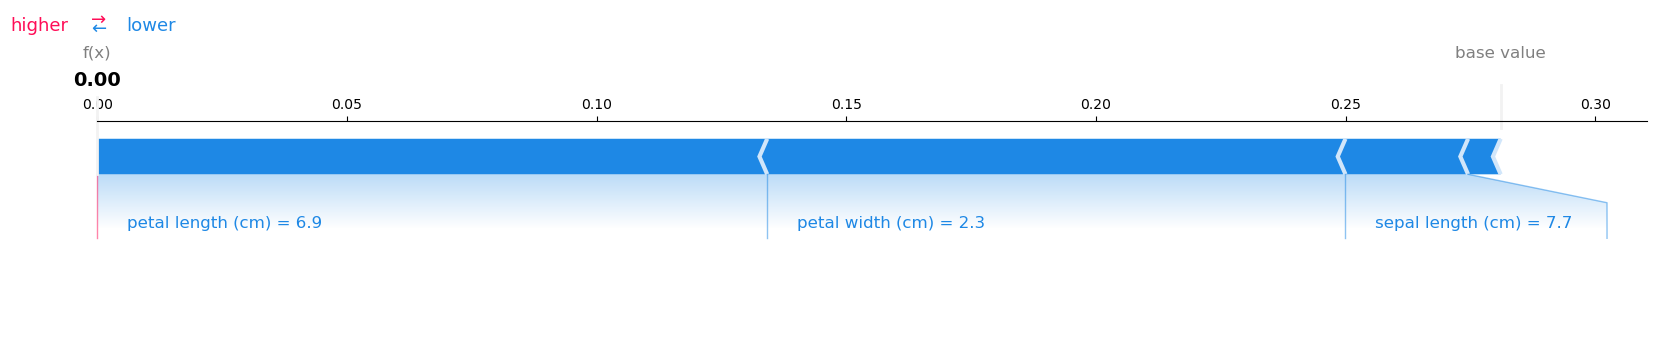

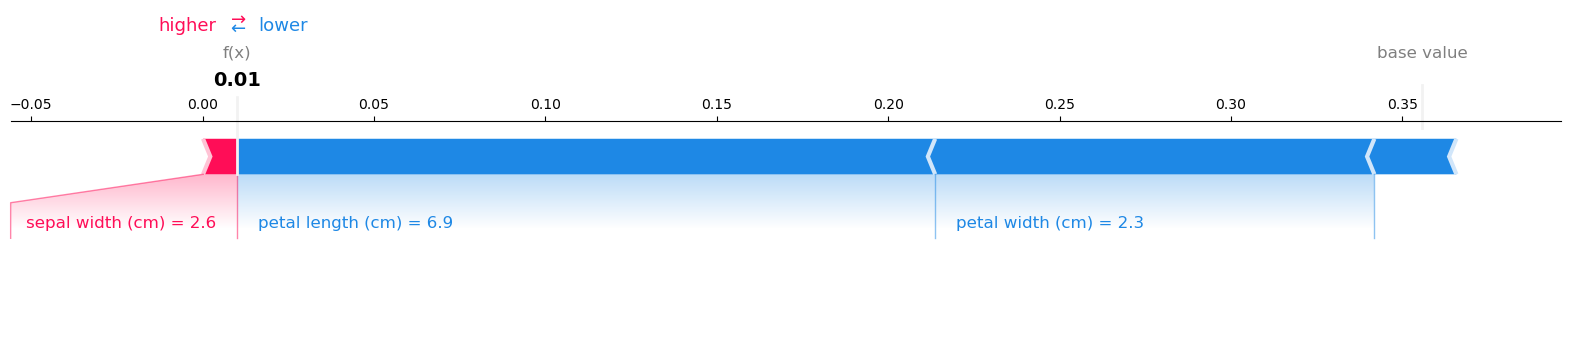

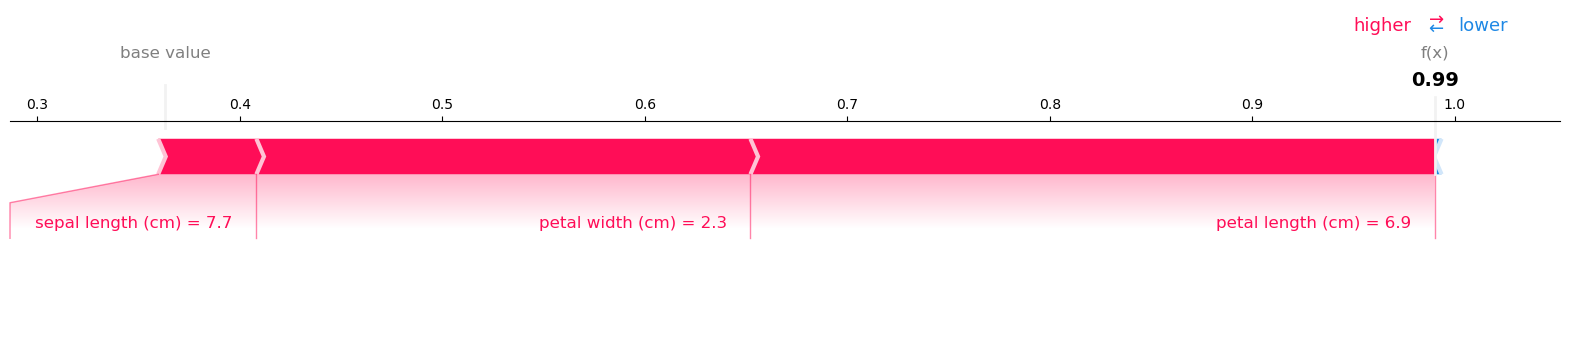

None

None

None

In [26]:
#seq 2 record  all class force chart
#extract single record feature importance
display(
shap.plots.force(explainer.expected_value[0], shap_values[0][2,:], X_test.iloc[2, :], matplotlib = True),
shap.plots.force(explainer.expected_value[1], shap_values[1][2,:], X_test.iloc[2, :], matplotlib = True),
shap.plots.force(explainer.expected_value[2], shap_values[2][2,:], X_test.iloc[2, :], matplotlib = True),
)

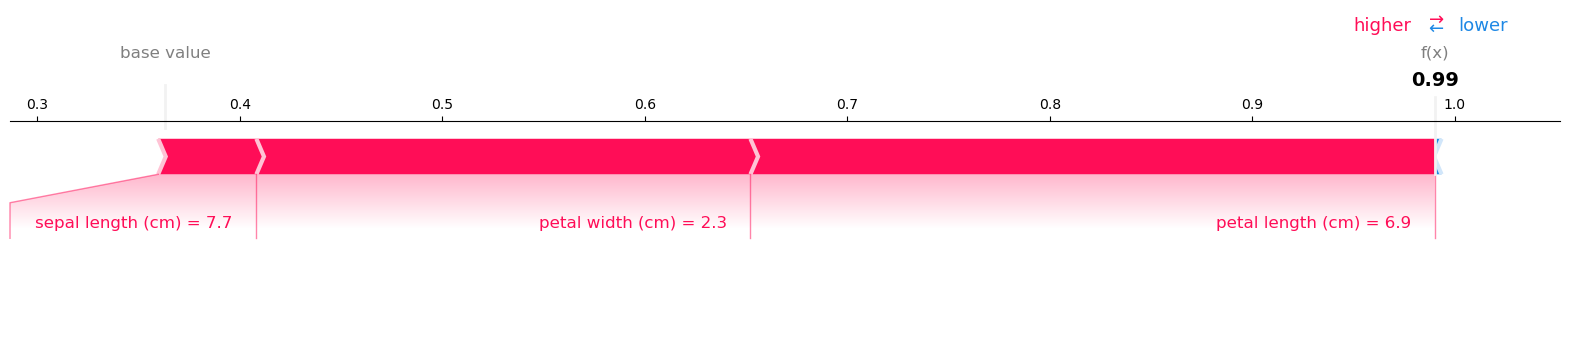

'petal length (cm):0.33786389552634294,petal width (cm):0.2439591662035966'

In [27]:
#let us see if rep want to know why this record was predicted to be class 2, we get the reason as text below and chart the same as above
get_top_k_feature(clf, X_test, clf_class=2, df_index =2, topk = 2, visul= True )